<a href="https://colab.research.google.com/github/rizkynb/Tugas-Kuliah/blob/main/Tugas_1_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [6]:
path = '/content/drive/MyDrive/MSIB Batch 6/Machine Learning & Deep Learning/insurance.csv'

df = pd.read_csv(path)

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataset descriptions:
- **Age** : Age of the insured
- **Sex** : Gender
- **Bmi** : body mass index
- **Children** : Number of children
- **Smoker** : Indicator if you smoke
- **Region** : Region where the insured lives
- **Charges** : Secure prime


## Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.shape

(1338, 7)

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [14]:
# Convert True/False values into 1/0
df_dummies.replace({True: 1, False: 0}, inplace=True)

# Shows result
df_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [15]:
df_dummies.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            int64
sex_male              int64
smoker_no             int64
smoker_yes            int64
region_northeast      int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

#Exploratory Data Analysis (EDA)

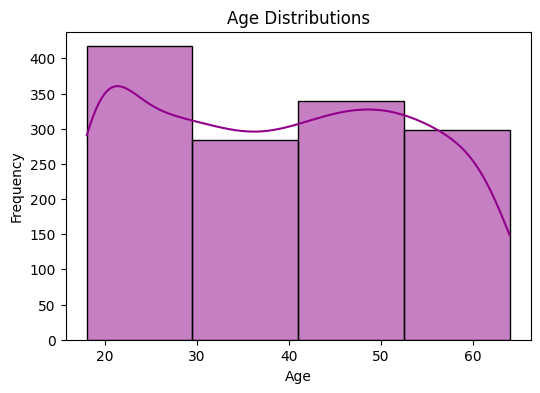

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x = 'age', bins = 4, kde = True, color= '#91008a')

plt.title('Age Distributions')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

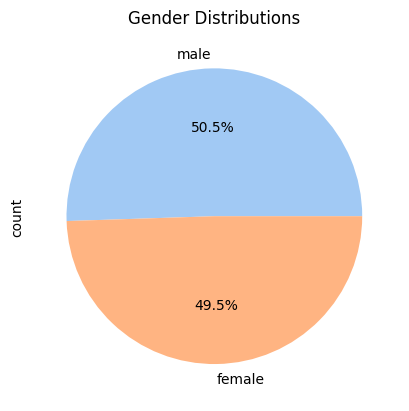

In [17]:
sns.set_palette('pastel')
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Gender Distributions')
plt.show()

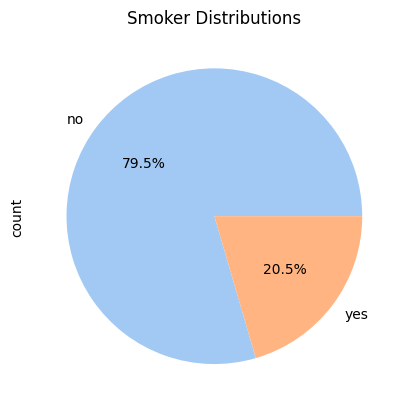

In [18]:
sns.set_palette('pastel')
df['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Smoker Distributions')
plt.show()

Text(0.5, 1.01, 'Region')

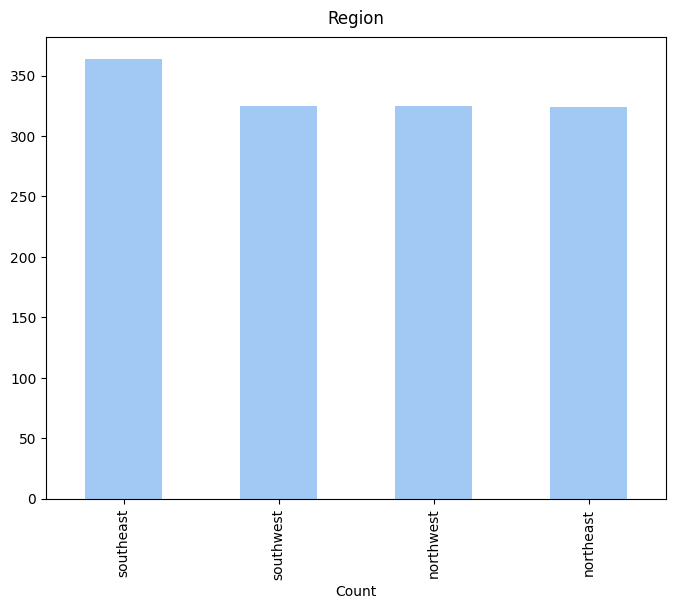

In [19]:
df['region'].value_counts().plot(kind='bar', figsize=(8,6))

plt.xlabel('Count')
plt.title('Region', y =1.01)

## Bivariate Analysis

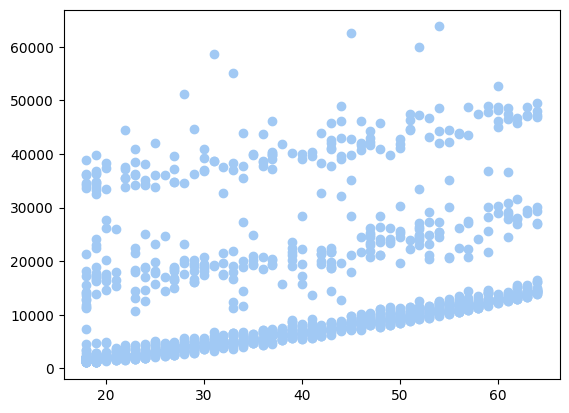

In [20]:
plt.scatter(df['age'], df['charges'])

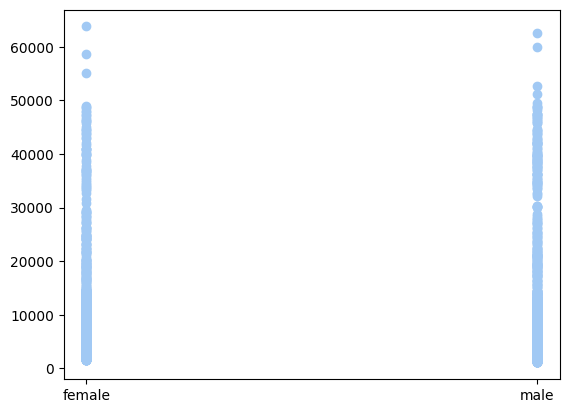

In [21]:
plt.scatter(df['sex'], df['charges'])

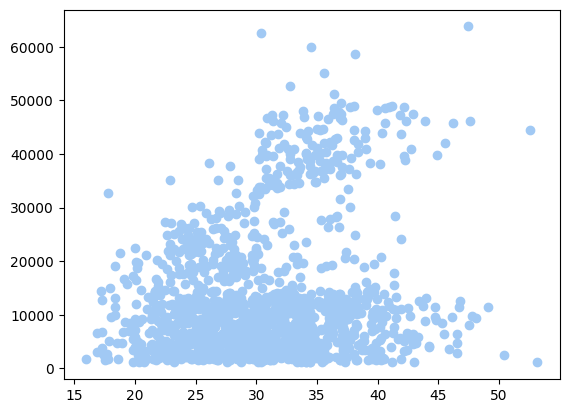

In [22]:
plt.scatter(df['bmi'], df['charges'])

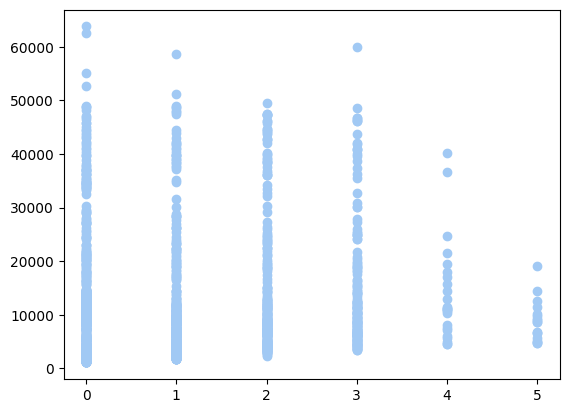

In [23]:
plt.scatter(df['children'], df['charges'])

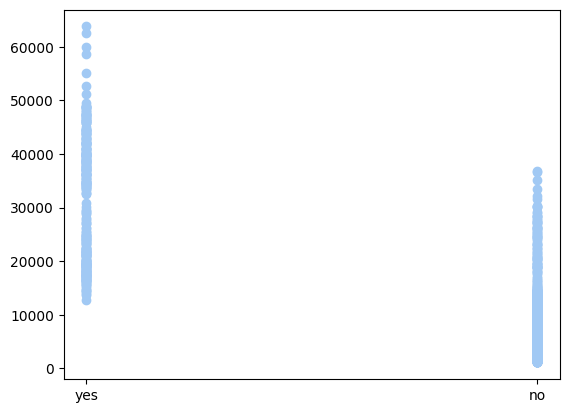

In [24]:
plt.scatter(df['smoker'], df['charges'])

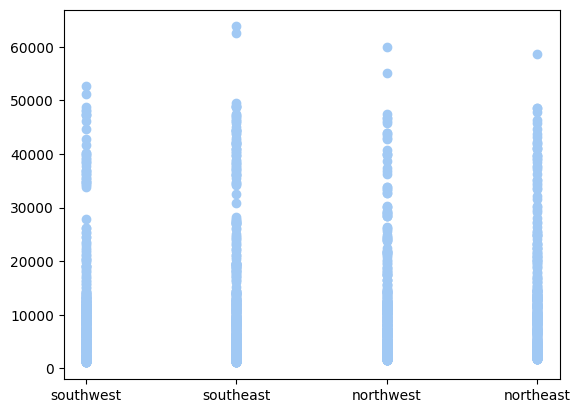

In [25]:
plt.scatter(df['region'], df['charges'])

Based on the visualization above, it can be seen that only **age** correlates with insurance charges.

<Axes: >

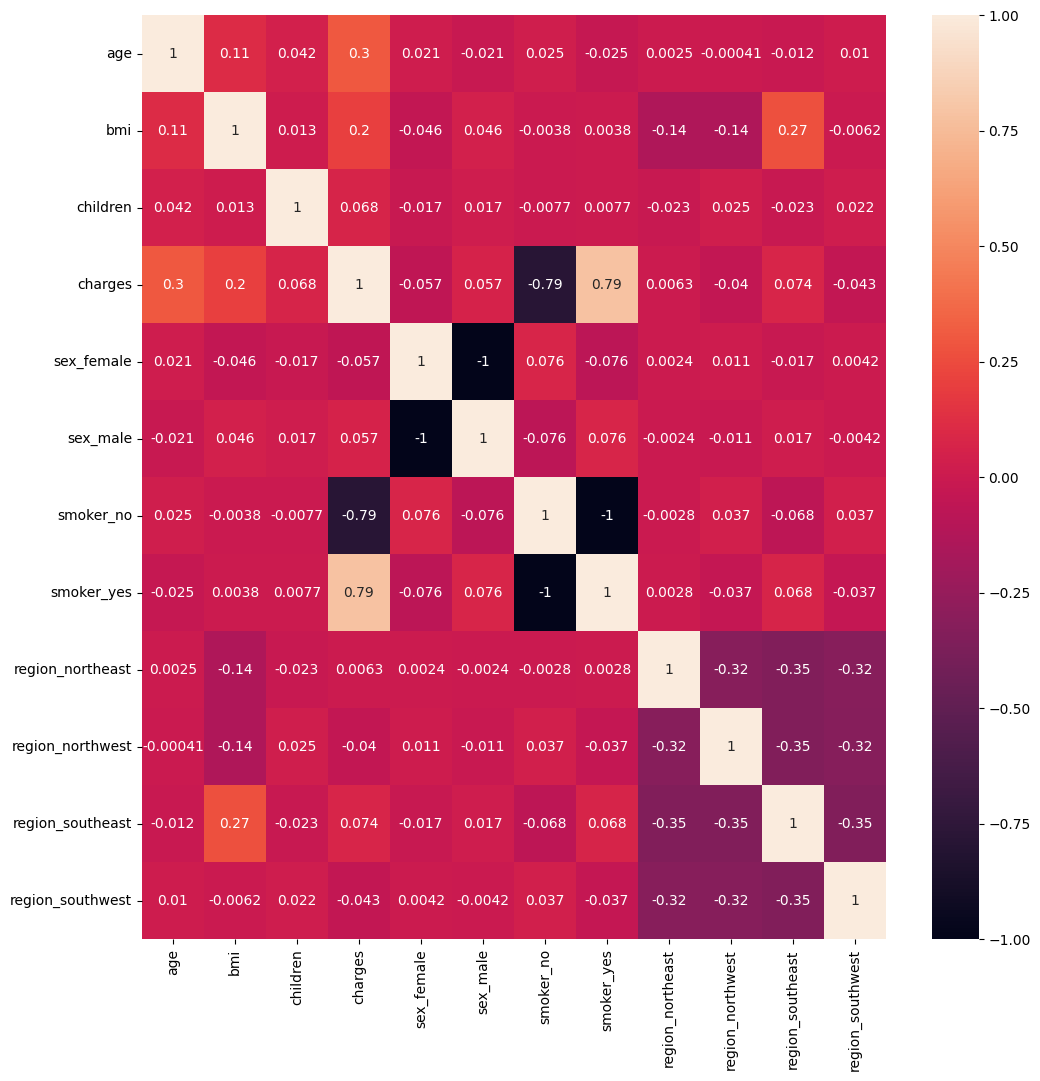

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), annot = True)

Conclusion:
1. A person who smoke has strong positive correlations with insurance charges
2. Age and BMI variables have an impact on the amount of insurance charges
3. Region has no impact
4. Interesting insight is, male person has positive correlation meanwhile female person has negative correlation

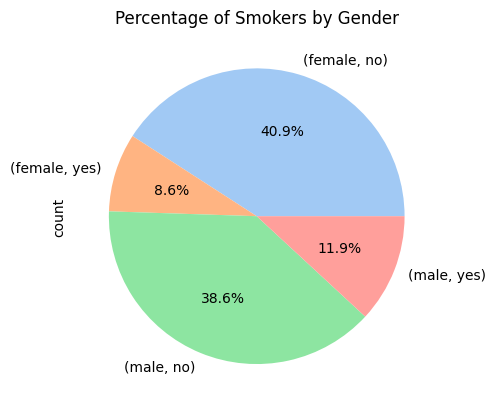

In [27]:
sns.set_palette('pastel')

smoker_by_sex = df.groupby('sex')['smoker'].value_counts().plot(kind='pie', autopct='%1.1f%%')

plt.title('Percentage of Smokers by Gender')
plt.show()

It can be seen that the proportion of male smokers is higher compared to female smokers.

# Modeling

## Machine Learning

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [30]:
X = df_dummies.drop(columns=['charges'])
y = df_dummies['charges']

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(df_dummies)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

### Linear Regression

MAE:  3998.412598772369
RMSE:  5726.742092741892


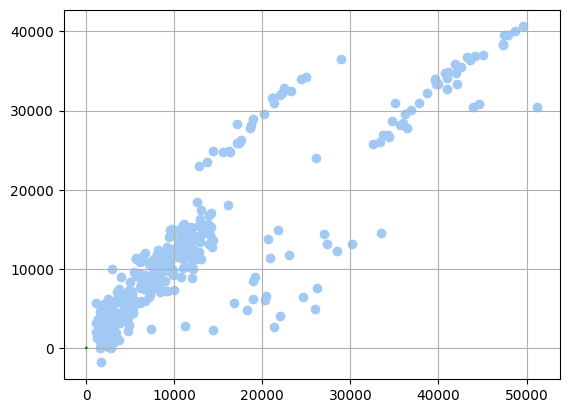

In [172]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_predict = model_lr.predict(X_test)
y_pred = y_predict.flatten()

mae_lr = mean_absolute_error(y_test, y_predict)
rmse_lr = (mean_squared_error(y_test, y_predict)**0.5)

print('MAE: ', mae_lr)
print('RMSE: ', rmse_lr)

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0,50), color = 'green')
plt.grid(True)

### Decision Tree

MAE:  3274.8423715492536
RMSE:  6672.306948173228


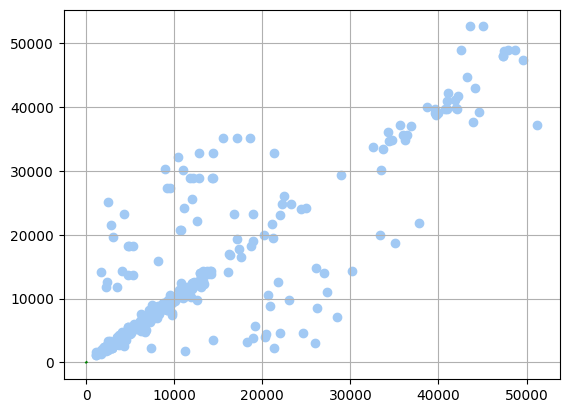

In [171]:
model_dr = DecisionTreeRegressor()
model_dr.fit(X_train, y_train)
y_predict = model_dr.predict(X_test)
y_pred = y_predict.flatten()

mae_dr = mean_absolute_error(y_test, y_predict)
rmse_dr = (mean_squared_error(y_test, y_predict)**0.5)

print('MAE: ', mae_dr)
print('RMSE: ', rmse_dr)

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0,50), color = 'green')
plt.grid(True)

### Support Vector Machines

MAE:  8278.346786345623
RMSE:  12566.451033928177


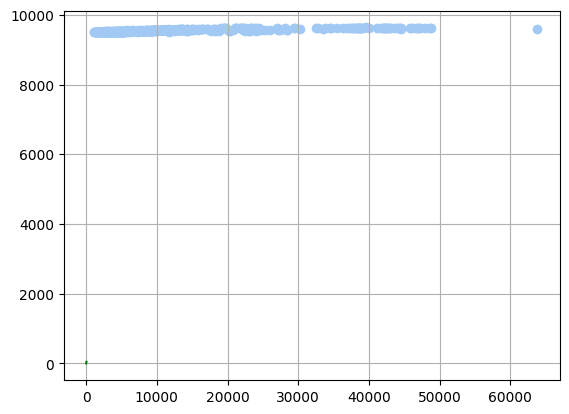

In [43]:
model_svm = SVR()
model_svm.fit(X_train, y_train)
y_predict = model_svm.predict(X_test)
y_pred = y_predict.flatten()

mae_svm = mean_absolute_error(y_test, y_predict)
rmse_svm = (mean_squared_error(y_test, y_predict)**0.5)

print('MAE: ', mae_svm)
print('RMSE: ', rmse_svm)

plt.scatter(y_test, y_pred)
plt.plot(np.arange(0,50), np.arange(0,50), color = 'green')
plt.grid(True)

## Deep Learning

In [44]:
import keras

from keras.models import Sequential
from keras import models, layers, optimizers

In [86]:
X = df_dummies.drop(columns=['charges'])
y = df_dummies['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [166]:
# Modeling

net = models.Sequential()
net.add(layers.Dense(24, activation = 'relu', input_shape = (11,)))
net.add(layers.Dense(32, activation = 'relu'))
net.add(layers.Dense(1))

In [167]:
# Evaluate model

net.compile(loss = 'mse', optimizer = 'adam', metrics=['mae'])

In [168]:
history = net.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 1, validation_split = 0.2)

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 331348992.0000 - mae: 13483.2031 - val_loss: 295409952.0000 - val_mae: 12522.9873
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 330864384.0000 - mae: 13466.8154 - val_loss: 294880832.0000 - val_mae: 12503.2734
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 330151712.0000 - mae: 13441.5889 - val_loss: 293991712.0000 - val_mae: 12470.0049
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 328888640.0000 - mae: 13397.1582 - val_loss: 292391264.0000 - val_mae: 12409.8604
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 326671072.0000 - mae: 13318.3076 - val_loss: 289693184.0000 - val_mae: 12308.0195
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 323086336.0000 - mae: 13192.3145 - val_loss: 285584576.0000 - val_mae: 12151.4824
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - los

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


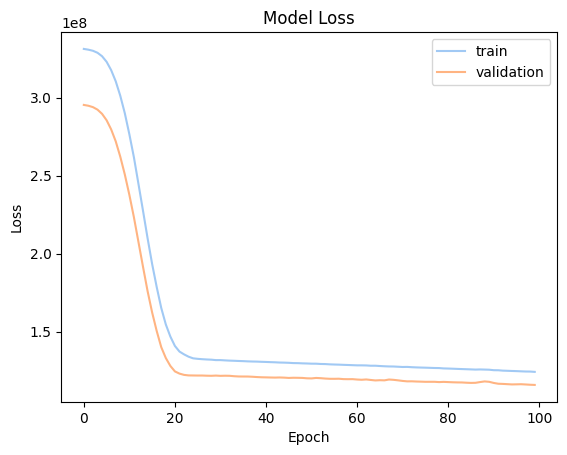

In [169]:
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

# Evaluating Model

Conclusion:
1. MAE
- Linear Regression : 3998
- Decision Tree : 3278
- SVM : 8278
- ANN : 7801

2. RMSE
- Linear Regression : 5726
- Decision Tree : 6672
- SVM : 12566
- ANN : 11139

Based on the modeling approaches in Machine Learning (Linear regression, Decision Tree and Support Vector Machines) and Deep Learning (Artificial Neural Network or known as ANN). I can be concluded that the optimal model from the existing dataset, assessed by metrics such as MAE and RMSE, is **Linear Regression** model.